# WeatherPy
----

#### Random City Generator and Weather Analysis by Latitudes


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        

City processed: ushuaia
City processed: butaritari
City NOT found: taolanaro
City processed: mataura
City processed: tsabong
City processed: qaanaaq
City processed: avarua
City processed: tuktoyaktuk
City processed: punta arenas
City processed: barrow
City processed: yagodnoye
City processed: cape town
City processed: faya
City NOT found: saleaula
City processed: hobart
City processed: salinas
City processed: sohag
City processed: rikitea
City processed: bairnsdale
City NOT found: tsihombe
City processed: te anau
City processed: hattiesburg
City processed: lorengau
City processed: tiarei
City processed: airai
City processed: jamestown
City processed: bagh
City processed: moyale
City processed: san quintin
City NOT found: bolungarvik
City processed: hilo
City processed: san gabriel casa blanca
City NOT found: barentsburg
City processed: sitka
City processed: port alfred
City processed: new norfolk
City processed: port elizabeth
City processed: talnakh
City processed: arraial do cabo
Cit

City processed: mareeba
City processed: pombia
City NOT found: umzimvubu
City processed: hokitika
City processed: sabang
City processed: margate
City processed: hasaki
City processed: ambikapur
City processed: korla
City processed: la libertad
City processed: quebo
City processed: mandalgovi
City processed: adrar
City processed: newport
City processed: portland
City processed: okhotsk
City processed: lavrentiya
City processed: narsaq
City processed: luau
City processed: kalmunai
City processed: port macquarie
City processed: atambua
City processed: eureka
City processed: turbat
City processed: florianopolis
City processed: canandaigua
City processed: chokurdakh
City processed: ko samui
City processed: acarau
City processed: savannah bight
City processed: lethem
City processed: nelson bay
City processed: lillehammer
City processed: san pedro
City processed: xuanhua
City processed: yerbogachen
City NOT found: mys shmidta
City processed: madimba
City NOT found: karauzyak
City processed: c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [5]:
#Windows desktop path
Weather_DF.to_csv(r'/Users/matth/OneDrive/Desktop/GitClones/python-api-challenge/output_data/Cities.csv', index = False)
#Macbook path
#Weather_DF.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/Cities.csv', index = False)
Weather_DF

City Country  Temperature  Humidity  Cloudiness  Windspeed  \
0       ushuaia      AR        37.40        89          91       6.93   
1    butaritari      KI        83.14        77          98      11.23   
2       mataura      NZ        39.00        83          33       3.00   
3       tsabong      BW        53.10        44           0       7.52   
4       qaanaaq      GL        40.42        69          99       7.87   
..          ...     ...          ...       ...         ...        ...   
561       rzhev      RU        59.70        88          98       9.89   
562        tura      IN        75.02        91           8       4.74   
563      dodoma      TZ        66.20        68          20       9.17   
564        ocos      GT        91.40        66          40       8.05   
565    denpasar      ID        80.60       100          40      11.41   

     Latitude  Longitude        Date  
0      -54.80     -68.30  1592688876  
1        3.07     172.79  1592688876  
2      -46.19     168.86  1592688877  
3      -26.02      22.40  1592688877  
4       77.48     -69.36  1592688877  
..        ...        ...         ...  
561     56.26      34.33  1592688919  
562     25.52      90.22  1592688919  
563     -6.17      35.74  1592688919  
564     14.51     -92.19  1592688919  
565     -8.65     115.22  1592688792  

[566 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

Empty DataFrame
Columns: [City, Country, Temperature, Humidity, Cloudiness, Windspeed, Latitude, Longitude, Date]
Index: []

In [7]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = Weather_DF.join(badHumidityDF, how='outer')
clean_city_data = Weather_DF.merge(badHumidityDF,on=index,inplace=False).query('index!=index')

In [8]:
# Extract relevant fields from the data frame
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
#Windows path
City_Data.to_csv(r'/Users/matth/OneDrive/Desktop/GitClones/python-api-challenge/output_data/City_Data.csv', index = False)
#Macbook path
#City_Data.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/City_Data.csv', index = False)
City_Data.head()

City Country  Latitude  Temperature  Humidity  Cloudiness  Windspeed  \
0     ushuaia      AR    -54.80        37.40        89          91       6.93   
1  butaritari      KI      3.07        83.14        77          98      11.23   
2     mataura      NZ    -46.19        39.00        83          33       3.00   
3     tsabong      BW    -26.02        53.10        44           0       7.52   
4     qaanaaq      GL     77.48        40.42        69          99       7.87   

         Date  
0  1592688876  
1  1592688876  
2  1592688877  
3  1592688877  
4  1592688877

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

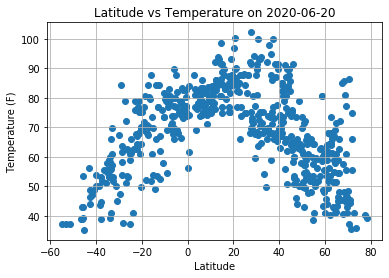

In [9]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

### Latitude vs Temperature Scatter Plot Insights

The scatter plot maps cities' temperature against their latitude.  Cities selected randomly.
The arc of the scatter plot shows temperature increasing near the equator (Latitude 0) and dropping off further away. Given the run date of June 2020, the plot also skews higher temperatures to the right of the equator due to summer in the northern hemisphere.

## Latitude vs. Humidity Plot

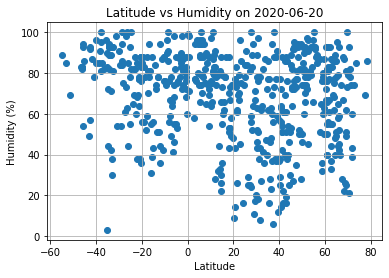

In [10]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

### Latitude vs Humidity Scatter Plot Insights

The scatter plot maps cities' humidity against their latitude.  Cities selected randomly.

The result reveals no particular correlation between humidity and latitude.

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

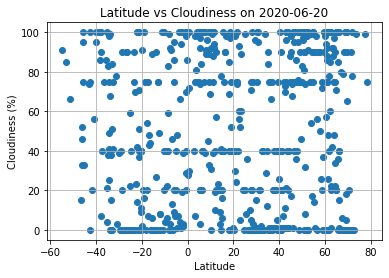

In [11]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

### Latitude vs Cloudiness Scatter Plot Insights

The scatter plot maps cities' cloudiness percent against their latitude.  Cities selected randomly.

The result reveals no particular correlation between cloudiness and latitude. There may however be a slight bias towards round cloudiness percentages, given the groupings near each 10s line (ex: 40% cloudiness).

## Latitude vs. Wind Speed Plot

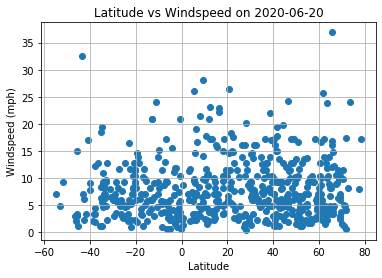

In [12]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

### Latitude vs Wind Speed Scatter Plot Insights

The scatter plot maps cities' wind speed against their latitude.  Cities selected randomly.

The result reveals no particular correlation between wind speed and latitude.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.6832066822269389
y = -0.5x + 89.33


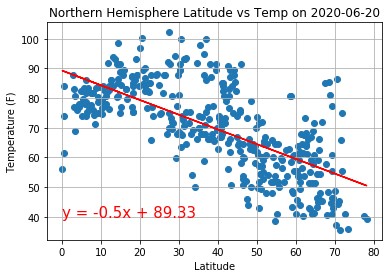

In [15]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7810599034722966
y = 0.77x + 80.74


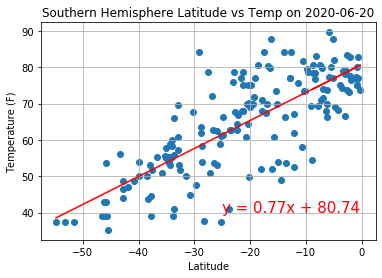

In [16]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

### North/South Latitude vs TEMPERATURE Linear Regression Insights

The scatter plot maps Northern and Southern cities' temperature against their latitude.  Cities selected randomly.

The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.06517863081603088
y = -0.07x + 69.27


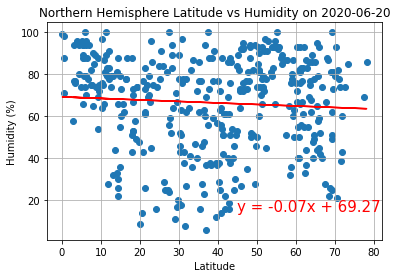

In [17]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.13440802925869613
y = -0.18x + 71.8


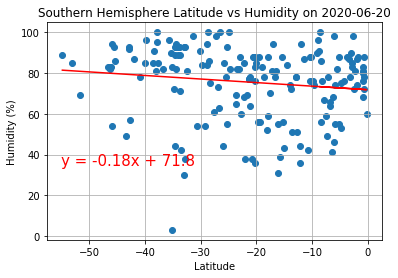

In [18]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

### North/South Latitude vs HUMIDITY Linear Regression Insights

The scatter plot maps Northern and Southern cities' humidity against their latitude.  Cities selected randomly.

The result reveals no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.004682549349075001
y = -0.01x + 51.95


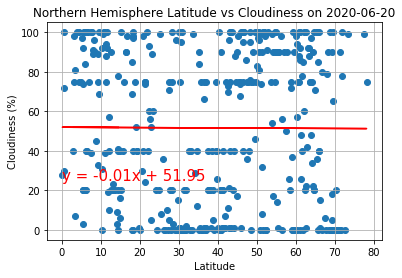

In [19]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is -0.1472269548994391
y = -0.4x + 34.64


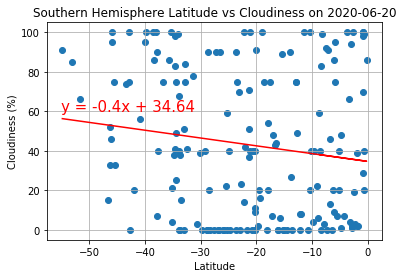

In [20]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

### North/South Latitude vs CLOUDINESS Linear Regression Insights

The scatter plot maps Northern and Southern cities' cloudiness against their latitude.  Cities selected randomly.

The result reveals no correlation between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.04421451915435909
y = -0.01x + 8.65


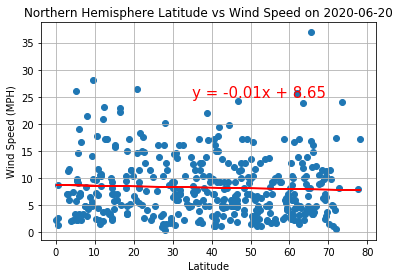

In [21]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.01804807721603142
y = -0.01x + 7.01


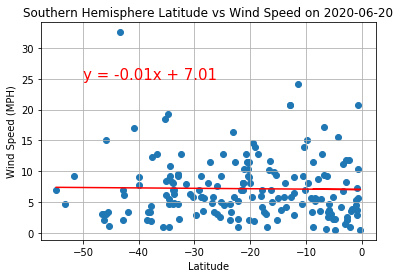

In [22]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

### North/South Latitude vs WIND SPEED Linear Regression Insights

The scatter plot maps Northern and Southern cities' wind speed against their latitude.  Cities selected randomly.

The result reveals no correlation between latitude and wind speed.